# Telling birds from airplanes: Learning from images
This chapter covers
- Building a feed-forward neural network
- Loading data using Datasets and DataLoaders
- Understanding classification loss

## A dataset of tiny images
---
use CIFAR-10 as an example, which includes 10 classes of images

In [1]:
# first download the dataset using datasets module in torchvision
from torchvision import datasets

data_path = './data/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # assign a save path, download training set if not exist
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # dev set

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified


In [3]:
# CIFAR10 is a subclass of Dataset
# __len__ and __getitem__ is needed for a Dataset
# __len__: return the total count of the sample
# __getitem__: get a sample, its features and label

len(cifar10), len(cifar10_val)

(50000, 10000)

In [5]:
# take a look at a picture from the dataset
img, label = cifar10[99]
img, label

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

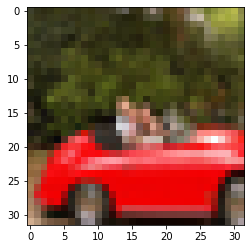

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img)

use transform to preprocess the data 

In [10]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

can add transforms to the dataset so that the samples will be transformed before \_\_getitem\_\_

In [12]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [14]:
# now the dataset will return a tensor instead of an image
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [17]:
# put all of the imgs together, compute mean and std of each channel to normalize it
import torch

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [21]:
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)
mean, std

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [23]:
# build a normalize transform
norm = transforms.Normalize(mean, std)

# use compose to put two transforms together
trans = transforms.Compose([
    transforms.ToTensor(),
    norm
])

In [31]:
# normalized dataset
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=trans)
transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=trans)

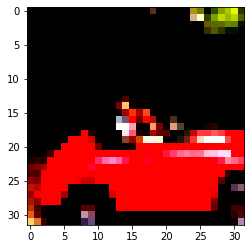

In [25]:
# try to plot the normalized data
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))  # matplotlib wants the channels to be at the final dimension

## Distinguishing birds from airplanes
---
pick out the birds and the planes from the dataset for training

In [32]:
# pick out these two kinds
label_map = {0:0, 2:1}  # reset the label to 0, 1
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

In [27]:
# use a mlp to fit the data
import torch.nn as nn
n_out = 2

model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.Softmax(dim=1)
)

<class 'torch.Tensor'>


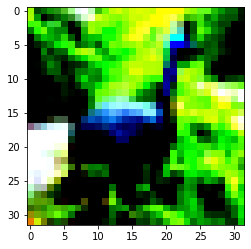

In [33]:
# test it on an image before training 
img, _ = cifar2[0]
print(type(img))
plt.imshow(img.permute(1,2,0))
plt.show()